In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [116]:
data = pd.read_excel("Evaluation.xlsx", sheet_name='Sheet4')
data.head()

,Unnamed: 0,Sample,Accuracy,Precision Positive,Recall,Precision Negative,Specificity,F1 Score,AUC,Huberty
0,Decision Tree,CV,46.6,66.9,39.4,33.6,61.2,49.6,50.1,-59.7
1,NaN,Test,61.7,88.1,65.8,9.5,28.8,75.4,50.1,-14.0
2,Random Forest,CV,55.6,66.8,66.3,33.8,34.3,66.5,51.7,-33.0
3,NaN,Test,55.8,67.1,66.6,33.6,34.0,66.8,52.1,-31.5
4,SVM,CV,49.8,66.0,50.7,32.8,48.0,57.3,49.3,-50.4


In [117]:
classes = np.array(['Decision Tree', 'Random Forest', 'SVM', 'XGBoost'])

sample = ['Test', 'CV']

precision1P = data.loc[data['Sample'] == sample[0], 'Precision Positive']
precision2P = data.loc[data['Sample'] == sample[1], 'Precision Positive']

precision1N = data.loc[data['Sample'] == sample[0], 'Precision Negative']
precision2N = data.loc[data['Sample'] == sample[1], 'Precision Negative']

accuracy1 = data.loc[data['Sample'] == sample[0], 'Accuracy']
accuracy2 = data.loc[data['Sample'] == sample[1], 'Accuracy']

recall1 = data.loc[data['Sample'] == sample[0], 'Recall']
recall2 = data.loc[data['Sample'] == sample[1], 'Recall']

espec1 = data.loc[data['Sample'] == sample[0], 'Specificity']
espec2 = data.loc[data['Sample'] == sample[1], 'Specificity']

fscore1 = data.loc[data['Sample'] == sample[0], 'F1 Score']
fscore2 = data.loc[data['Sample'] == sample[1], 'F1 Score']

auc1 = data.loc[data['Sample'] == sample[0], 'AUC']
auc2 = data.loc[data['Sample'] == sample[1], 'AUC']

huberty1 = data.loc[data['Sample'] == sample[0], 'Huberty']
huberty2 = data.loc[data['Sample'] == sample[1], 'Huberty']

In [118]:
metrics = pd.DataFrame({
    'Models': classes,
    f'Precision2 {sample[0]}': precision1P.values,
    f'Precision2 {sample[1]}': precision2P.values,
    f'Precision3 {sample[0]}': precision1N.values,
    f'Precision3 {sample[1]}': precision2N.values,
    f'Accuracy {sample[0]}': accuracy1.values,
    f'Accuracy {sample[1]}': accuracy2.values,
    f'Recall {sample[0]}': recall1.values,
    f'Recall {sample[1]}': recall2.values,
    f'Especificity {sample[0]}': espec1.values,
    f'Especificity {sample[1]}': espec2.values,
    f'F1 Score {sample[0]}': fscore1.values,
    f'F1 Score {sample[1]}': fscore2.values,
    f'AUC {sample[0]}':auc1.values,
    f'AUC {sample[1]}':auc2.values,
    f'Huberty {sample[0]}':huberty1.values,
    f'Huberty {sample[1]}':huberty2.values
})

metrics.head()

,Models,Precision2 Test,Precision2 CV,Precision3 Test,Precision3 CV,Accuracy Test,Accuracy CV,Recall Test,Recall CV,Especificity Test,Especificity CV,F1 Score Test,F1 Score CV,AUC Test,AUC CV,Huberty Test,Huberty CV
0,Decision Tree,88.1,66.9,9.5,33.6,61.7,46.6,65.8,39.4,28.8,61.2,75.4,49.6,50.1,50.1,-14.0,-59.7
1,Random Forest,67.1,66.8,33.6,33.8,55.8,55.6,66.6,66.3,34.0,34.3,66.8,66.5,52.1,51.7,-31.5,-33.0
2,SVM,99.0,66.0,1.7,32.8,66.3,49.8,66.6,50.7,47.0,48.0,79.6,57.3,51.8,49.3,-0.2,-50.4
3,XGBoost,55.6,67.1,49.3,35.9,53.4,62.1,68.4,84.8,35.9,16.9,61.4,74.9,50.7,52.4,-38.5,-13.3


In [119]:
tidy = metrics[['Models', f'Precision2 {sample[0]}', f'Precision3 {sample[0]}', f'Accuracy {sample[0]}', f'Recall {sample[0]}', f'Especificity {sample[0]}', f'F1 Score {sample[0]}', f'AUC {sample[0]}', f'AUC {sample[0]}']].melt(id_vars='Models').rename(columns=str.title)
tidy

,Models,Variable,Value
0,Decision Tree,Precision2 Test,88.1
1,Random Forest,Precision2 Test,67.1
2,SVM,Precision2 Test,99.0
3,XGBoost,Precision2 Test,55.6
4,Decision Tree,Precision3 Test,9.5
5,Random Forest,Precision3 Test,33.6
6,SVM,Precision3 Test,1.7
7,XGBoost,Precision3 Test,49.3
8,Decision Tree,Accuracy Test,61.7
9,Random Forest,Accuracy Test,55.8


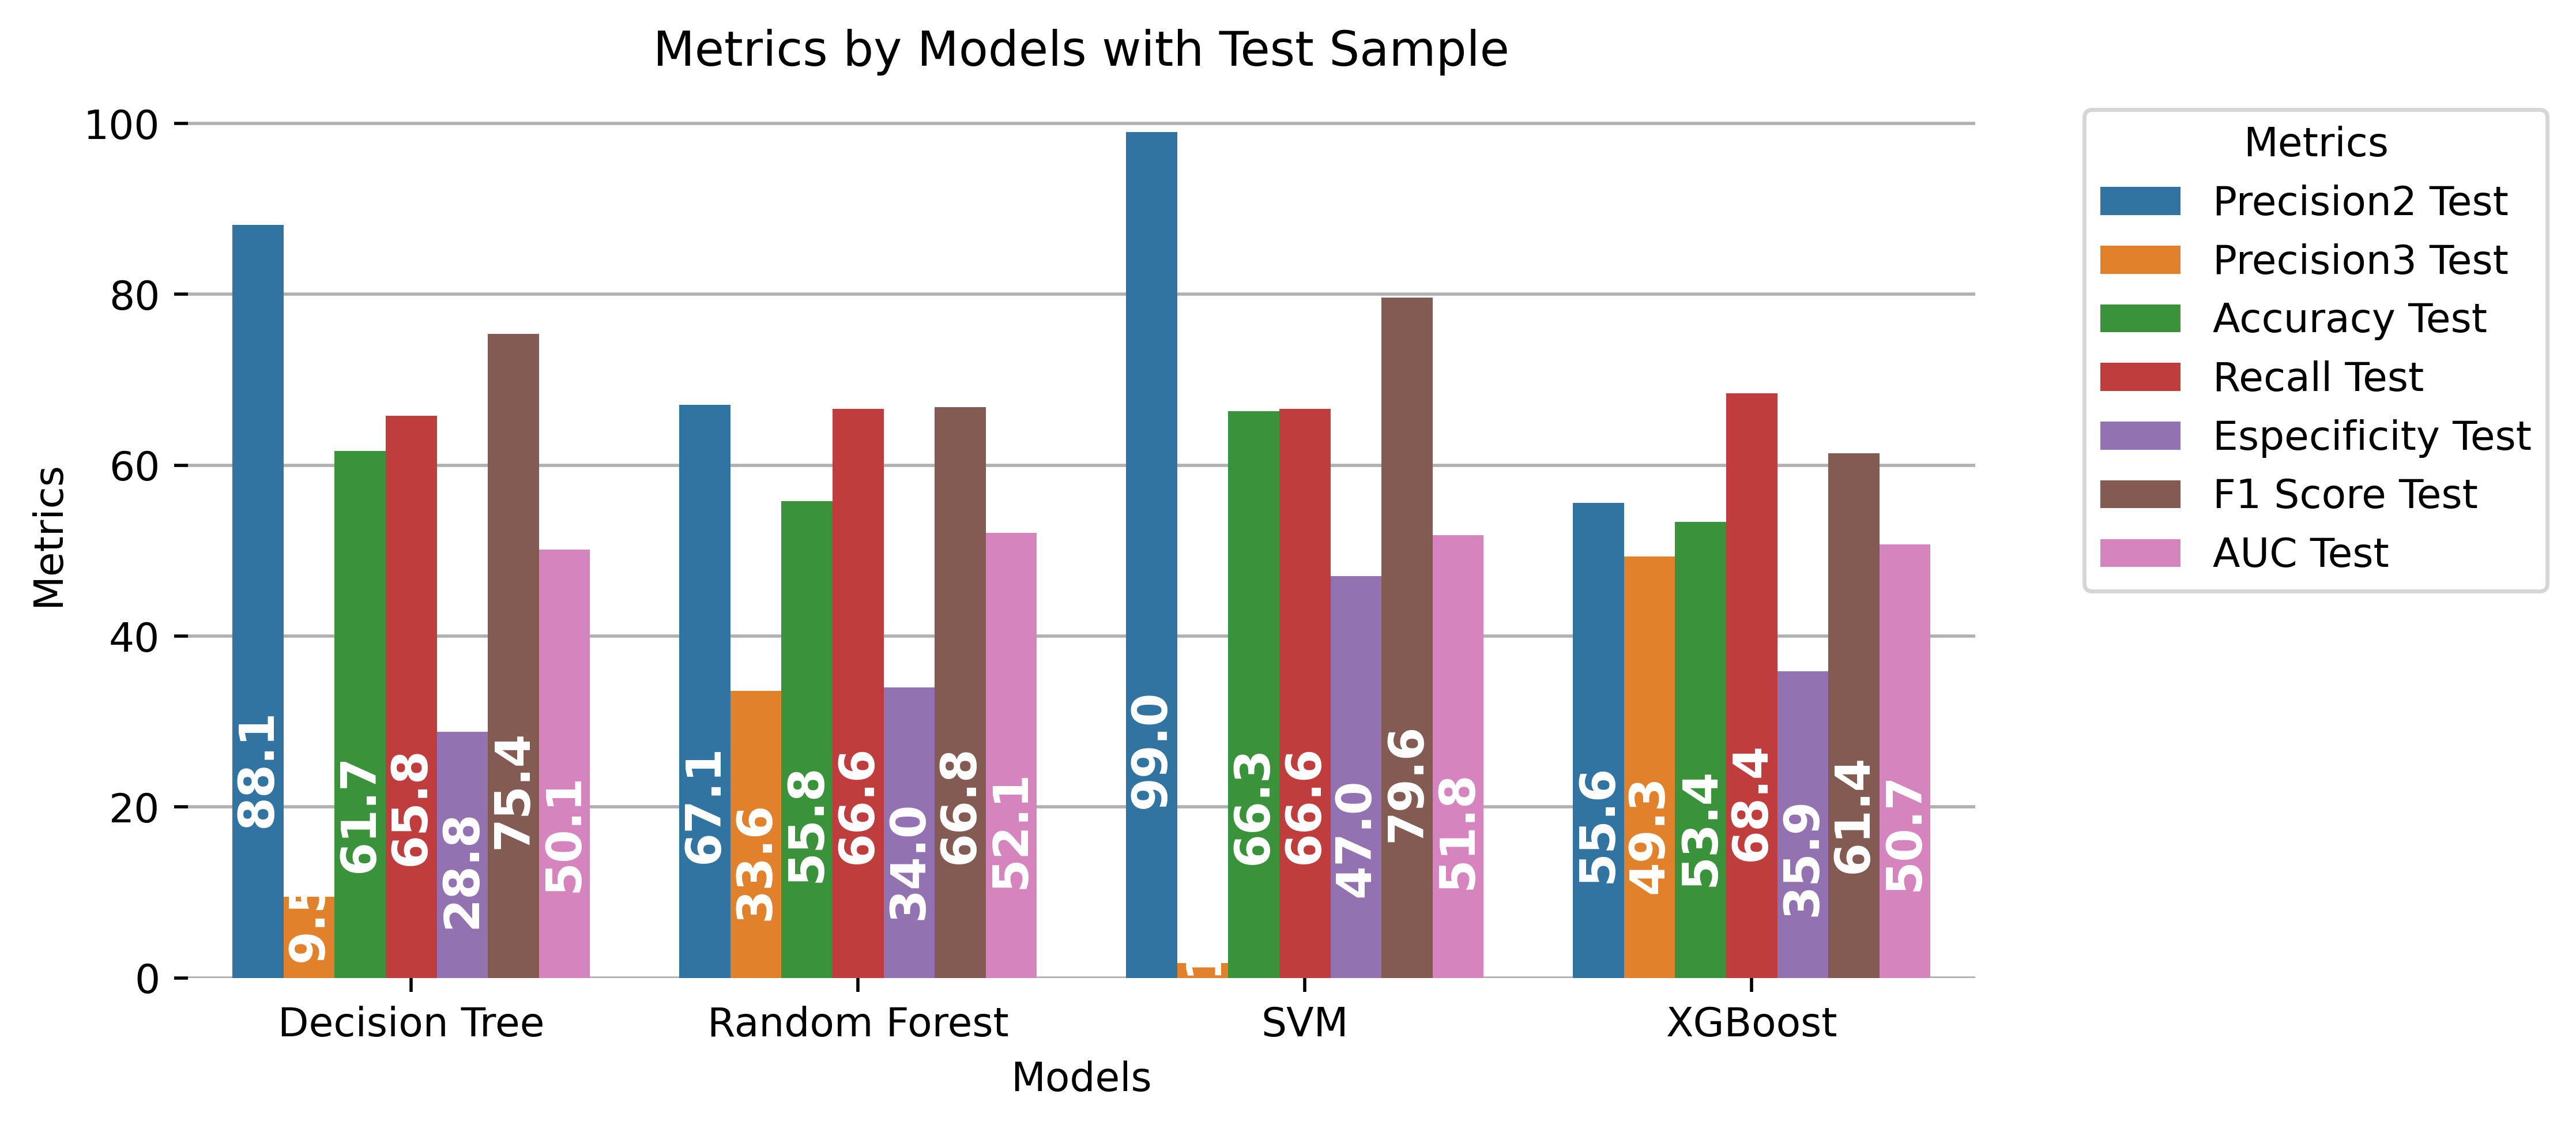

In [120]:
plt.figure(figsize=(8, 4), dpi=500)
ax = sns.barplot(x='Models', y='Value', hue='Variable', data=tidy)

for patch in ax.patches:
    ax.text(patch.get_x() + patch.get_width() / 2., 0.2 * patch.get_height(),
           round(patch.get_height(), 2),
           ha='center', va='bottom', fontsize=12, fontweight='bold', rotation=90, color='white')

# Removendo as bordas
for spine in ax.spines.values():
    spine.set_visible(False)

# Coloca as grades para trás
ax.set_axisbelow(True)

plt.legend(
        title='Metrics',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
)
plt.ylabel('Metrics')
plt.xlabel('Models')
plt.grid(axis='y')
plt.title('Metrics by Models with Test Sample')
plt.show()

In [121]:
tidy = metrics[['Models', f'Precision2 {sample[1]}', f'Precision3 {sample[1]}', f'Accuracy {sample[1]}', f'Recall {sample[1]}', f'Especificity {sample[1]}', f'F1 Score {sample[1]}', f'AUC {sample[1]}']].melt(id_vars='Models').rename(columns=str.title)
tidy.head()

,Models,Variable,Value
0,Decision Tree,Precision2 CV,66.9
1,Random Forest,Precision2 CV,66.8
2,SVM,Precision2 CV,66.0
3,XGBoost,Precision2 CV,67.1
4,Decision Tree,Precision3 CV,33.6


In [122]:
tidy.tail()

,Models,Variable,Value
23,XGBoost,F1 Score CV,74.9
24,Decision Tree,AUC CV,50.1
25,Random Forest,AUC CV,51.7
26,SVM,AUC CV,49.3
27,XGBoost,AUC CV,52.4


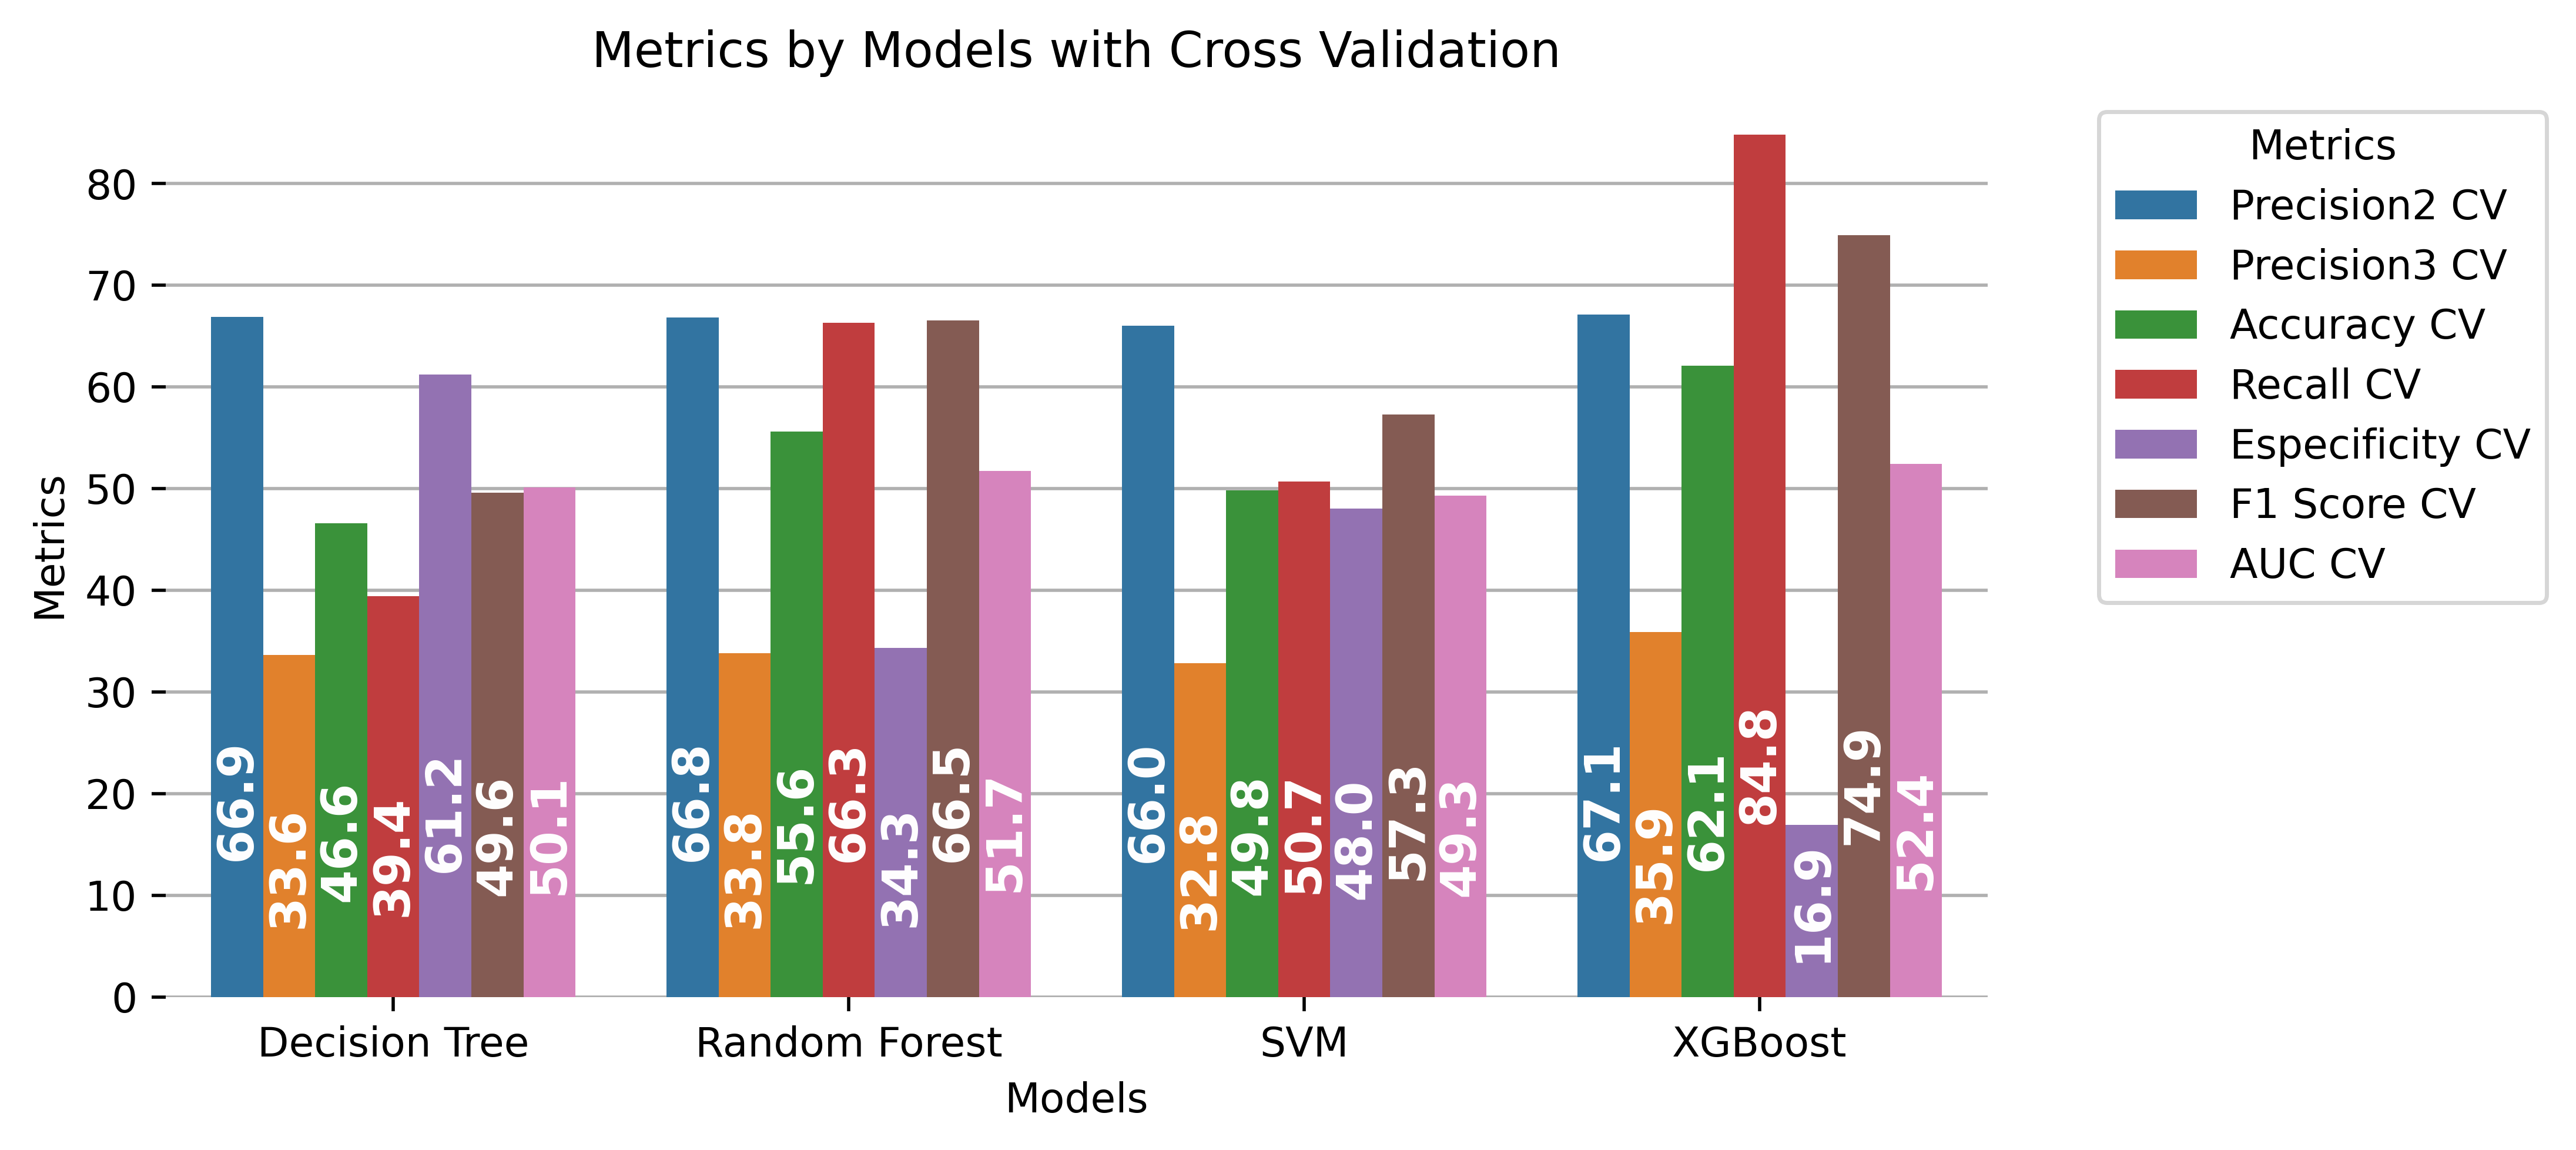

In [123]:
plt.figure(figsize=(8, 4), dpi=500)
ax = sns.barplot(x='Models', y='Value', hue='Variable', data=tidy)

for patch in ax.patches:
    ax.text(patch.get_x() + patch.get_width() / 2., 0.2 * patch.get_height(),
           round(patch.get_height(), 2),
           ha='center', va='bottom', fontsize=12, fontweight='bold', rotation=90, color='white')

# Removendo as bordas
for spine in ax.spines.values():
    spine.set_visible(False)

# Coloca as grades para trás
ax.set_axisbelow(True)

plt.legend(
        title='Metrics',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
)
plt.ylabel('Metrics')
plt.xlabel('Models')
plt.grid(axis='y')
plt.title('Metrics by Models with Cross Validation')
plt.show()

In [125]:
%%capture
fig, axes = plt.subplots(figsize=(9, 38), nrows=8, ncols=1)

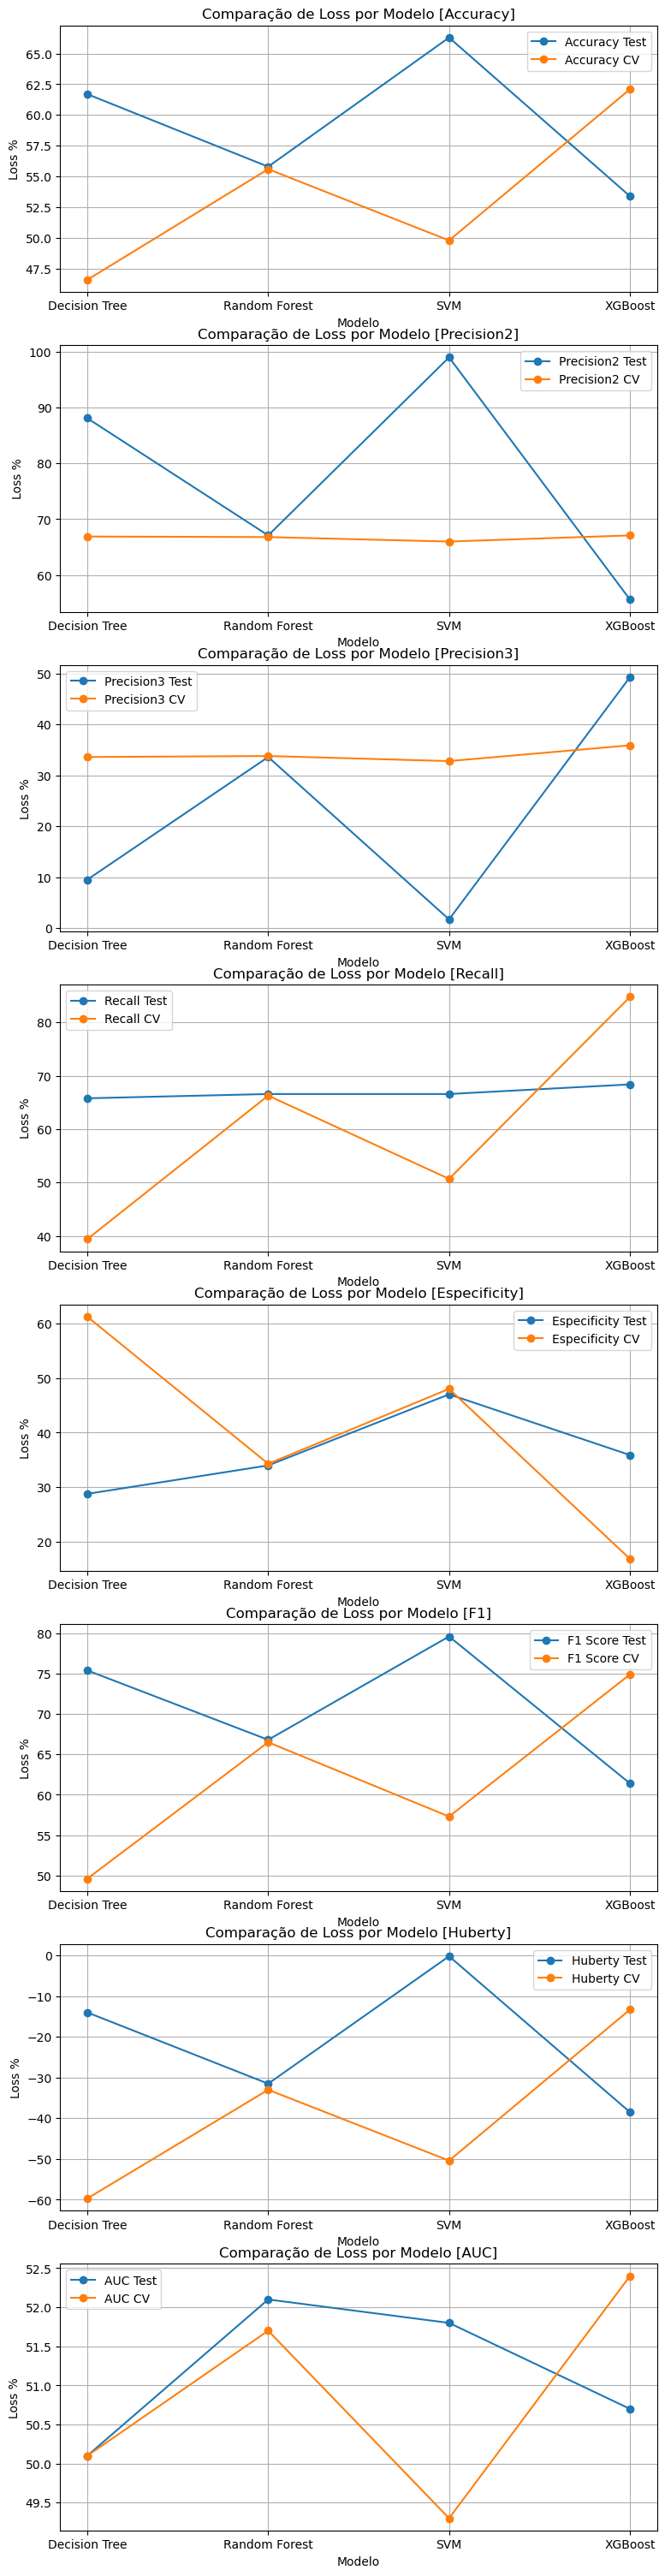

In [126]:
select = [
    ['Models', f'Accuracy {sample[0]}', f'Accuracy {sample[1]}'],
    ['Models', f'Precision2 {sample[0]}', f'Precision2 {sample[1]}'],
    ['Models', f'Precision3 {sample[0]}', f'Precision3 {sample[1]}'],
    ['Models', f'Recall {sample[0]}', f'Recall {sample[1]}'],
    ['Models', f'Especificity {sample[0]}', f'Especificity {sample[1]}'],
    ['Models', f'F1 Score {sample[0]}', f'F1 Score {sample[1]}'],
    ['Models', f'Huberty {sample[0]}', f'Huberty {sample[1]}'],
    ['Models', f'AUC {sample[0]}', f'AUC {sample[1]}'],
]

for i in range(8):
    df_melted = metrics[select[i]].melt(id_vars='Models', var_name='Conjunto', value_name='Loss')
    
    # Plot
    for conjunto in df_melted['Conjunto'].unique():
        subset = df_melted[df_melted['Conjunto'] == conjunto]
        axes[i].plot(subset['Models'], subset['Loss'], marker='o', label=conjunto)
    
    axes[i].set_title(f'Comparação de Loss por Modelo [{select[i][1].split()[0]}]')
    axes[i].set_xlabel('Modelo')
    axes[i].set_ylabel('Loss %')
    # plt.ylim(0, 100)
    axes[i].legend()
    axes[i].grid(True)
    # axes[i].set_tight_layout()
    # plt.show()

fig

In [127]:
%%capture
fig, axes = plt.subplots(figsize=(10, 4), nrows=1, ncols=2, dpi=500)

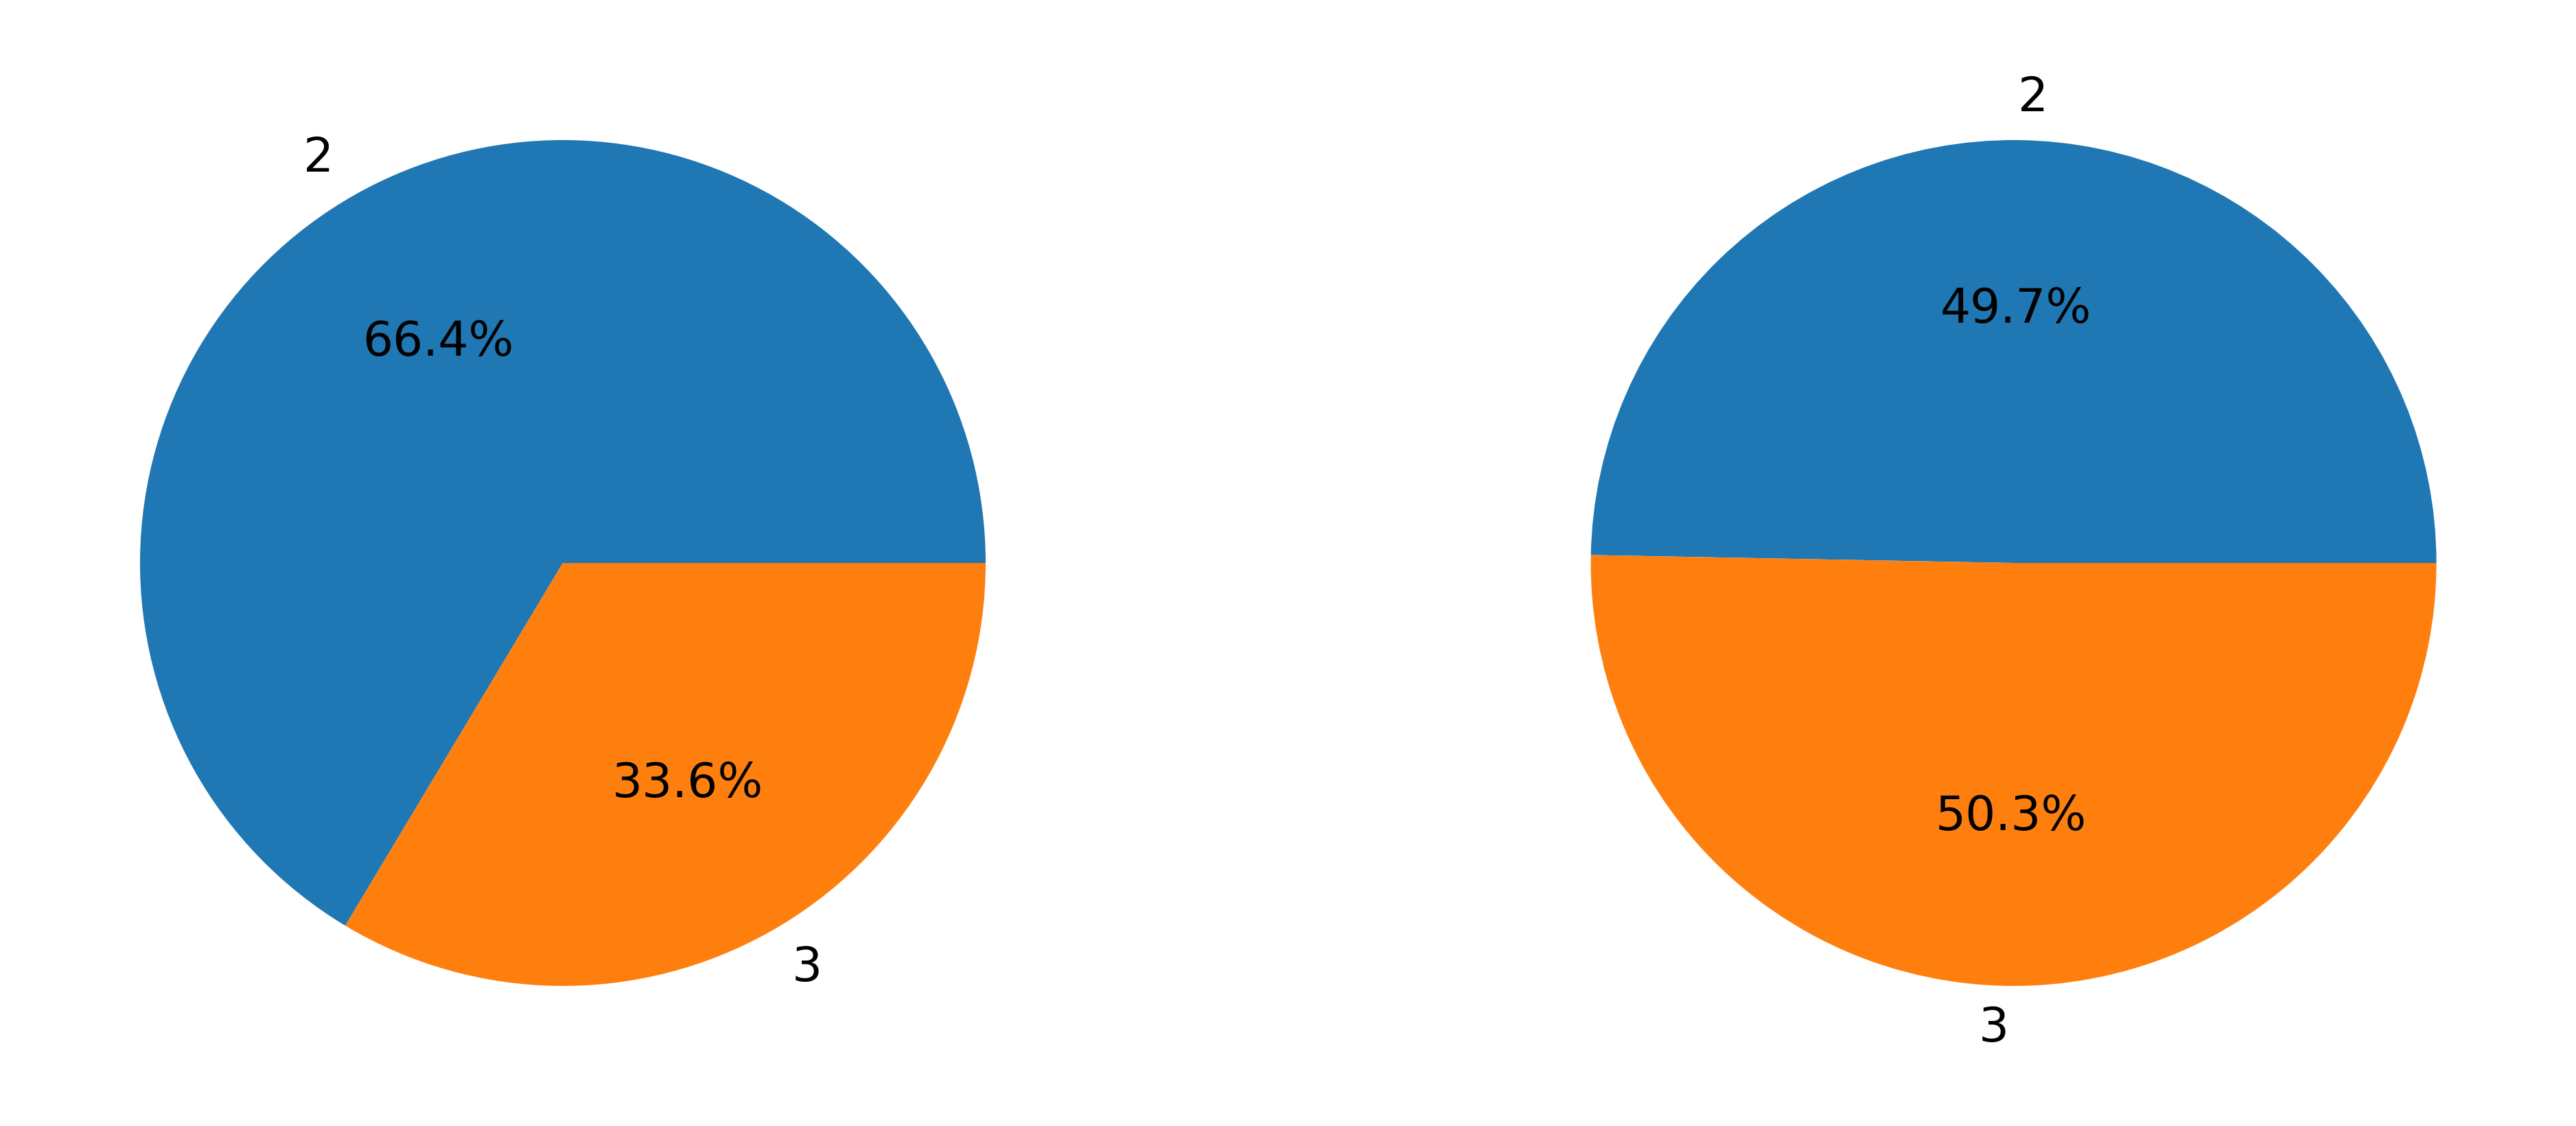

In [128]:
axes[0].pie(x=[66.4, 33.6], labels=['2', '3'], autopct='%1.1f%%')

axes[1].pie(x=[49.7, 50.3], labels=['2', '3'], autopct='%1.1f%%')
fig